<a href="https://colab.research.google.com/github/Mamoona81/data-analysis-and-visualization/blob/main/EDA_on_Earthquake_Dataset_to_predict_future_earthquakes_in_region.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt

df= pd.read_csv('/earthquake_1995-2023.csv')

In [14]:
df.head(10)


,title,magnitude,date_time,cdi,mmi,alert,tsunami,sig,net,nst,dmin,gap,magType,depth,latitude,longitude,location,continent,country
0,"M 6.5 - 42 km W of Sola, Vanuatu",6.5,16-08-2023 12:47,7,4,green,0,657,us,114,7.177000,25.0,mww,192.955,-13.8814,167.1580,"Sola, Vanuatu",NaN,Vanuatu
1,"M 6.5 - 43 km S of Intipucá, El Salvador",6.5,19-07-2023 00:22,8,6,yellow,0,775,us,92,0.679000,40.0,mww,69.727,12.8140,-88.1265,"Intipucá, El Salvador",NaN,NaN
2,"M 6.6 - 25 km ESE of Loncopué, Argentina",6.6,17-07-2023 03:05,7,5,green,0,899,us,70,1.634000,28.0,mww,171.371,-38.1911,-70.3731,"Loncopué, Argentina",South America,Argentina
3,"M 7.2 - 98 km S of Sand Point, Alaska",7.2,16-07-2023 06:48,6,6,green,1,860,us,173,0.907000,36.0,mww,32.571,54.3844,-160.6990,"Sand Point, Alaska",NaN,NaN
4,M 7.3 - Alaska Peninsula,7.3,16-07-2023 06:48,0,5,NaN,1,820,at,79,0.879451,172.8,Mi,21.000,54.4900,-160.7960,Alaska Peninsula,NaN,NaN
5,"M 6.6 - 277 km NNE of Codrington, Antigua and ...",6.6,10-07-2023 20:28,5,4,green,1,802,us,95,2.454000,37.0,mww,10.000,20.0196,-61.0955,"Codrington, Antigua and Barbuda",NaN,NaN
6,M 6.9 - Tonga,6.9,02-07-2023 10:27,4,4,green,1,741,us,136,1.179000,23.0,mww,229.000,-17.8530,-174.9370,Tonga,NaN,NaN
7,M 7.2 - south of the Fiji Islands,7.2,15-06-2023 18:06,8,6,green,1,804,us,85,2.590000,24.0,mww,167.404,-22.9824,-177.2080,the Fiji Islands,NaN,NaN
8,M 6.6 - Panama-Colombia border region,6.6,25-05-2023 03:05,6,6,green,1,733,us,50,2.163000,129.0,mww,10.000,8.8894,-77.1231,Panama-Colombia border region,NaN,Colombia
9,M 7.1 - southeast of the Loyalty Islands,7.1,20-05-2023 01:51,3,4,green,1,777,us,98,2.812000,56.0,mww,35.981,-23.0622,170.4560,the Loyalty Islands,NaN,NaN


In [15]:
df.shape
#how many rows and columns of data there are in total

(1000, 19)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 19 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   title      1000 non-null   object 
 1   magnitude  1000 non-null   float64
 2   date_time  1000 non-null   object 
 3   cdi        1000 non-null   int64  
 4   mmi        1000 non-null   int64  
 5   alert      449 non-null    object 
 6   tsunami    1000 non-null   int64  
 7   sig        1000 non-null   int64  
 8   net        1000 non-null   object 
 9   nst        1000 non-null   int64  
 10  dmin       1000 non-null   float64
 11  gap        1000 non-null   float64
 12  magType    1000 non-null   object 
 13  depth      1000 non-null   float64
 14  latitude   1000 non-null   float64
 15  longitude  1000 non-null   float64
 16  location   994 non-null    object 
 17  continent  284 non-null    object 
 18  country    651 non-null    object 
dtypes: float64(6), int64(5), object(8)
memory usage: 

In [18]:
df.columns

Index(['title', 'magnitude', 'date_time', 'cdi', 'mmi', 'alert', 'tsunami',
       'sig', 'net', 'nst', 'dmin', 'gap', 'magType', 'depth', 'latitude',
       'longitude', 'location', 'continent', 'country'],
      dtype='object')

In [19]:
df['date_time'] = pd.to_datetime(df['date_time'], format='%d-%m-%Y %H:%M')


In [20]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 19 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   title      1000 non-null   object        
 1   magnitude  1000 non-null   float64       
 2   date_time  1000 non-null   datetime64[ns]
 3   cdi        1000 non-null   int64         
 4   mmi        1000 non-null   int64         
 5   alert      449 non-null    object        
 6   tsunami    1000 non-null   int64         
 7   sig        1000 non-null   int64         
 8   net        1000 non-null   object        
 9   nst        1000 non-null   int64         
 10  dmin       1000 non-null   float64       
 11  gap        1000 non-null   float64       
 12  magType    1000 non-null   object        
 13  depth      1000 non-null   float64       
 14  latitude   1000 non-null   float64       
 15  longitude  1000 non-null   float64       
 16  location   994 non-null    object        
 

In [21]:
# 1.3.2: # Calculate days with most earth quakes make the code short and simple .

days_with_most_earthquakes = df['date_time'].dt.date.value_counts().nlargest(10)
days_with_most_earthquakes

,count
date_time,
2022-01-11,7
2011-03-11,5
2014-06-23,4
2021-03-04,4
2018-10-22,3
2007-09-12,3
2011-08-20,3
1996-06-10,3
2022-11-09,3


In [23]:
#1.3.3 Extract the month data
#extract the month data from the date column and add that extracted month data
#into a new column called month
df['month'] = df['date_time'].dt.month
df.head()

,title,magnitude,date_time,cdi,mmi,alert,tsunami,sig,net,nst,dmin,gap,magType,depth,latitude,longitude,location,continent,country,month
0,"M 6.5 - 42 km W of Sola, Vanuatu",6.5,2023-08-16 12:47:00,7,4,green,0,657,us,114,7.177000,25.0,mww,192.955,-13.8814,167.1580,"Sola, Vanuatu",NaN,Vanuatu,8
1,"M 6.5 - 43 km S of Intipucá, El Salvador",6.5,2023-07-19 00:22:00,8,6,yellow,0,775,us,92,0.679000,40.0,mww,69.727,12.8140,-88.1265,"Intipucá, El Salvador",NaN,NaN,7
2,"M 6.6 - 25 km ESE of Loncopué, Argentina",6.6,2023-07-17 03:05:00,7,5,green,0,899,us,70,1.634000,28.0,mww,171.371,-38.1911,-70.3731,"Loncopué, Argentina",South America,Argentina,7
3,"M 7.2 - 98 km S of Sand Point, Alaska",7.2,2023-07-16 06:48:00,6,6,green,1,860,us,173,0.907000,36.0,mww,32.571,54.3844,-160.6990,"Sand Point, Alaska",NaN,NaN,7
4,M 7.3 - Alaska Peninsula,7.3,2023-07-16 06:48:00,0,5,NaN,1,820,at,79,0.879451,172.8,Mi,21.000,54.4900,-160.7960,Alaska Peninsula,NaN,NaN,7


In [24]:
# 1.3.4 Calculate the number of Quakes per month
quakes_per_month = df['month'].value_counts().sort_index()
quakes_per_month

,count
month,
1,85
2,79
3,81
4,95
5,81
6,57
7,77
8,85
9,92


In [28]:
#1.3.5 Convert the month number to text
df['month'] = pd.to_datetime(df['month'], format='%m')  # Use format='%m' if 'month' contains numbers only
df['month_txt'] = df['month'].dt.month_name().str.slice(stop=3)
df.head()

,title,magnitude,date_time,cdi,mmi,alert,tsunami,sig,net,nst,...,gap,magType,depth,latitude,longitude,location,continent,country,month,month_txt
0,"M 6.5 - 42 km W of Sola, Vanuatu",6.5,2023-08-16 12:47:00,7,4,green,0,657,us,114,...,25.0,mww,192.955,-13.8814,167.1580,"Sola, Vanuatu",NaN,Vanuatu,1900-08-01,Aug
1,"M 6.5 - 43 km S of Intipucá, El Salvador",6.5,2023-07-19 00:22:00,8,6,yellow,0,775,us,92,...,40.0,mww,69.727,12.8140,-88.1265,"Intipucá, El Salvador",NaN,NaN,1900-07-01,Jul
2,"M 6.6 - 25 km ESE of Loncopué, Argentina",6.6,2023-07-17 03:05:00,7,5,green,0,899,us,70,...,28.0,mww,171.371,-38.1911,-70.3731,"Loncopué, Argentina",South America,Argentina,1900-07-01,Jul
3,"M 7.2 - 98 km S of Sand Point, Alaska",7.2,2023-07-16 06:48:00,6,6,green,1,860,us,173,...,36.0,mww,32.571,54.3844,-160.6990,"Sand Point, Alaska",NaN,NaN,1900-07-01,Jul
4,M 7.3 - Alaska Peninsula,7.3,2023-07-16 06:48:00,0,5,NaN,1,820,at,79,...,172.8,Mi,21.000,54.4900,-160.7960,Alaska Peninsula,NaN,NaN,1900-07-01,Jul


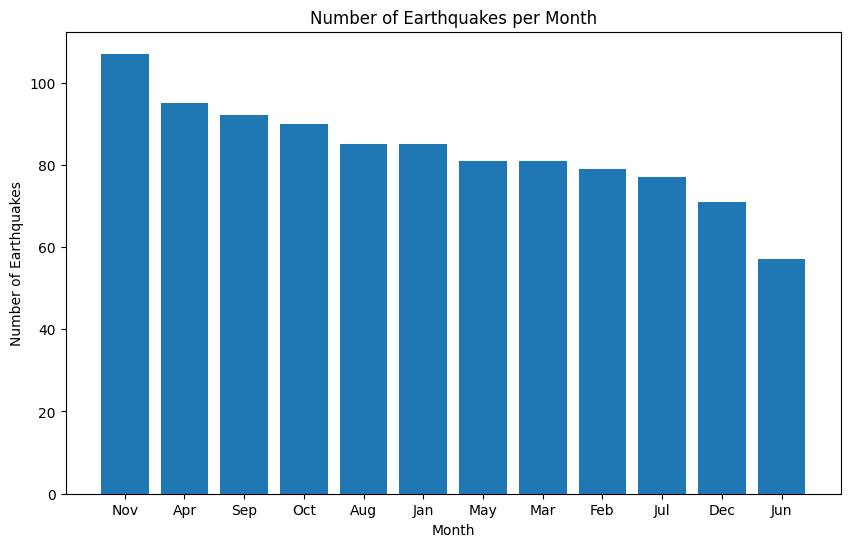

In [33]:
# prompt: #1.3.6 Create a new dataframe for plotting. x axis represent number of quakes and y axis represent earthquakes counts
# Create a new DataFrame for plotting
quake_counts = df['month_txt'].value_counts().reset_index()
quake_counts.columns = ['Month', 'Number of Quakes']  # Rename columns for clarity

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(quake_counts['Month'], quake_counts['Number of Quakes'])
plt.xlabel('Month')
plt.ylabel('Number of Earthquakes')
plt.title('Number of Earthquakes per Month')
plt.show()